In [1]:
# Load libraries
import pandas
import numpy
from sklearn import metrics
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

In [4]:
###Decision Tree
false_positive_rate_dt=[0,0.08,1]
true_positive_rate_dt=[0,0.92,1]
thresholds_dt=[2,1,0]
roc_auc_DT=0.916
cm_dt= numpy.array([[102,10],[11,127]])


###Random Forest
false_positive_rate_rf=[0,0.07,1]
true_positive_rate_rf=[0,0.93,1]
thresholds_rf=[2,1,0]
roc_auc_rf=0.908
cm_rf=numpy.array([[99,13],[ 10,  128]])


###Naive Bayes
false_positive_rate_nb=[0,0.05, 1]
true_positive_rate_nb=[0,0.95,1 ]
thresholds_nb=[2,1,0]
roc_auc_nb=0.908
cm_nb=numpy.array([[96,16],[ 7,131]])


### AdaBoost
false_positive_rate_adaBoost=[0,0.12,1]
true_positive_rate_adaBoost=[0,0.88,1]
thresholds_adaBoost=[2,1,0]
roc_auc_adaBoost=0.892
cm_adaBoost = numpy.array([[101,11],[16,122]])


###SVM
false_positive_rate_svm=[ 0.        ,  0.08,  1.        ]
true_positive_rate_svm=[ 0.        ,  0.92,  1.        ]
thresholds_svm=[2,1,0]
roc_auc_svm=0.916
cm_svm=numpy.array([[97,15],[10,127]])

###K-N-N
false_positive_rate_knn=[0,0.09,1]
true_positive_rate_knn=[0,0.91,1]
thresholds_knn=[2,1,0]
roc_auc_knn=0.884
cm_knn=numpy.array([[96,16],[13,125]]) 


### Logistic Regression
false_positive_rate_lr=[0,0.12,1]
true_positive_rate_lr=[0,0.88,1]
thresholds_lr=[2,1,0]
roc_auc_lr=0.892
cm_lr = numpy.array([[101,11],[16,122]])

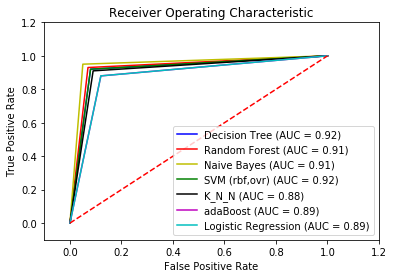

In [5]:
#ROC curve
plt.title('Receiver Operating Characteristic')

plt.plot(false_positive_rate_dt, true_positive_rate_dt, 'b',label='Decision Tree (AUC = %0.2f)'% roc_auc_DT)
plt.plot(false_positive_rate_rf, true_positive_rate_rf, 'r',label='Random Forest (AUC = %0.2f)'% roc_auc_rf)
plt.plot(false_positive_rate_nb, true_positive_rate_nb, 'y',label='Naive Bayes (AUC = %0.2f)'% roc_auc_nb)
plt.plot(false_positive_rate_svm, true_positive_rate_svm, 'g',label='SVM (rbf,ovr) (AUC = %0.2f)'% roc_auc_svm)
plt.plot(false_positive_rate_knn, true_positive_rate_knn, 'k',label='K_N_N (AUC = %0.2f)'% roc_auc_knn)
plt.plot(false_positive_rate_adaBoost, true_positive_rate_adaBoost, 'm',label='adaBoost (AUC = %0.2f)'% roc_auc_adaBoost)
plt.plot(false_positive_rate_lr, true_positive_rate_lr, 'c',label='Logistic Regression (AUC = %0.2f)'% roc_auc_lr)

plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig('ROCplot.png',dpi= 300)
plt.show()

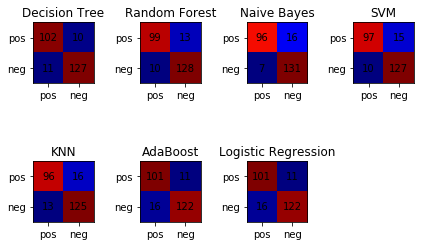

In [6]:
import numpy as np

fig = plt.figure()
plt.clf()
plt.tight_layout()

pos=1
cm_list=[]
cm_list.append(cm_dt)
cm_list.append(cm_rf)
cm_list.append(cm_nb)
cm_list.append(cm_svm)
cm_list.append(cm_knn)
cm_list.append(cm_adaBoost)
cm_list.append(cm_lr)


# print(cm_list)
for conf_arr in cm_list:
    norm_conf = []
    for i in conf_arr:
        a = 0
        tmp_arr = []
        a = sum(i, 0)
        for j in i:
            tmp_arr.append(float(j)/float(a))
        norm_conf.append(tmp_arr)

    
    ax = fig.add_subplot(2,4,pos)
    pos=pos+1
    ax.set_aspect(1)
    res = ax.imshow(np.array(norm_conf), cmap=plt.cm.jet, 
                    interpolation='nearest')

    width, height = conf_arr.shape

    for x in xrange(width):
        for y in xrange(height):
            ax.annotate(str(conf_arr[x][y]), xy=(y, x), 
                        horizontalalignment='center',
                        verticalalignment='center')
    
    tle=["Decision Tree","Random Forest","Naive Bayes", "SVM","KNN", "AdaBoost", "Logistic Regression"]
    plt.title(tle[pos-2])
    plt.xticks(range(width), ['pos','neg'])
    plt.yticks(range(height), ['pos','neg'])
plt.tight_layout()
plt.savefig('ConfusionMatrix.png',dpi=600)
plt.show()